In [3]:
import pandas as pd
import numpy as np
import jax
import jax.numpy as jnp
from jax.experimental.optimizers import adam

In [68]:
df = pd.read_csv('us_wealth.csv').drop('Unnamed: 0', axis=1)

<AxesSubplot:xlabel='quantile'>

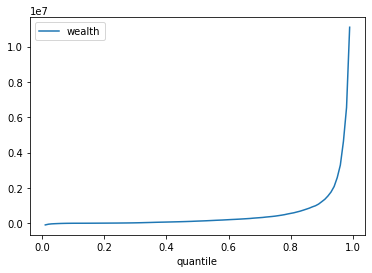

In [69]:
df.plot(x='quantile', y='wealth')

<AxesSubplot:xlabel='quantile'>

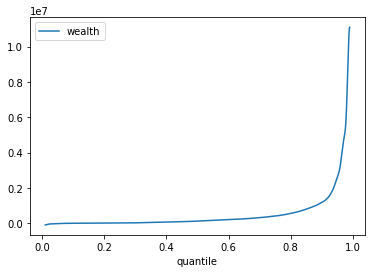

In [90]:
quantiles = pd.DataFrame(np.clip(np.linspace(0, 1, int(1e6) + 1), 0.01, 0.99))
quantiles.columns = ['quantile']
df_interp = pd.merge(quantiles, df, how='left').interpolate(method='cubicspline')
df_interp.plot(x='quantile', y='wealth')

<AxesSubplot:xlabel='wealth'>

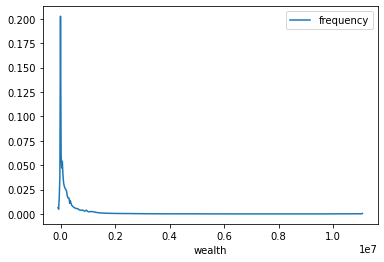

In [123]:
n = 500
q = []

wealths = np.linspace(df['wealth'].min(), df['wealth'].max(), n)
for i in range(n-1):
    qs = df_interp[df_interp['wealth'].between(wealths[i], wealths[i+1], inclusive='left')]['quantile']
    q.append(qs.max() - qs.min())
    
wealth_dist = pd.concat([pd.DataFrame(wealths), pd.DataFrame(q)], axis=1).dropna()
wealth_dist.columns = ['wealth', 'frequency']
wealth_dist.dropna().plot(x='wealth', y='frequency')

In [9]:
alpha = 5
beta = -1e3
n = 500
q = []

df = pd.DataFrame(jnp.exp(alpha * jax.random.normal(jax.random.PRNGKey(1), shape=(n,))) + beta)
df.columns=['wealth']

wealths = np.linspace(df['wealth'].min(), df['wealth'].max(), n)
for i in range(n-1):
    qs = df_interp[df_interp['wealth'].between(wealths[i], wealths[i+1], inclusive='left')]['quantile']
    q.append(qs.max() - qs.min())
    
wealth_dist = pd.concat([pd.DataFrame(wealths), pd.DataFrame(q)], axis=1).dropna()
wealth_dist.columns = ['wealth', 'frequency']
wealth_dist.dropna().plot(x='wealth', y='frequency')

NameError: name 'df_interp' is not defined